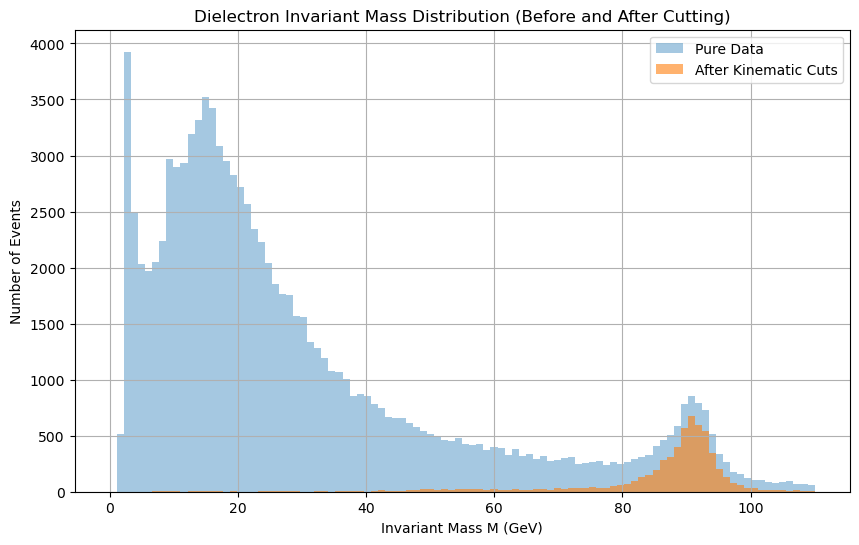

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

data = pd.read_csv('dielectron.csv')  

data_cut = data[
    (data['Q1'] * data['Q2'] < 0) & #(e+  +  e-)
    (data['pt1'] > 20) & (data['pt2'] > 20) & # (Transverse momentum)
    (abs(data['eta1']) < 2.4) & (abs(data['eta2']) < 2.4) # (Absoulete value must be less than 2.4)
]

plt.figure(figsize=(10, 6))

# bins: number of histogram intervals (resolution)
# range: x-axis range of the histogram (min and max M values)

plt.hist(data['M'], bins=100, range=(0, 110), alpha=0.4, label='Pure Data')
plt.hist(data_cut['M'], bins=100, range=(0, 110), alpha=0.6, label='After Kinematic Cuts')
plt.xlabel('Invariant Mass M (GeV)')
plt.ylabel('Number of Events')
plt.title('Dielectron Invariant Mass Distribution (Before and After Cutting)')
plt.legend()
plt.grid(True)
plt.show()

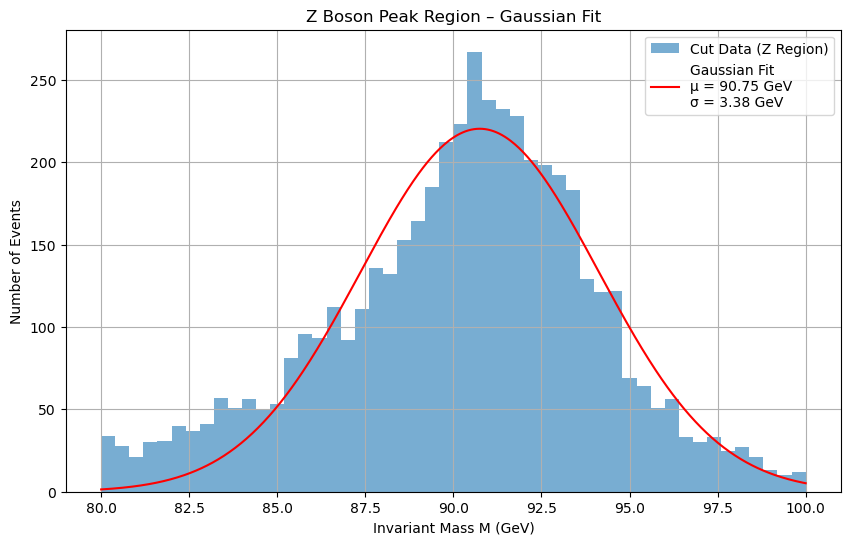

In [6]:

data_fit = data_cut[(data_cut['M'] > 80) & (data_cut['M'] < 100)] # Z region

counts, bins = np.histogram(data_fit['M'], bins=50, range=(80, 100))
bin_centers = 0.5 * (bins[1:] + bins[:-1])

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

initial_guess = [max(counts), 91, 2.5] # Max counts --> Value of the highest column in the histogram, 91 --> The expected mass of this Z boson, 2.5--> Natural width of the Z boson

params= opt.curve_fit(gaussian, bin_centers, counts, p0=initial_guess)[0] # Ignore covariants matrix
A_fit, mu_fit, sigma_fit = params

x_fit = np.linspace(80, 100, 500)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

plt.figure(figsize=(10, 6))
plt.hist(data_fit['M'], bins=50, range=(80, 100), alpha=0.6, label='Cut Data (Z Region)')
plt.plot(x_fit, y_fit, 'r-', label=f'Gaussian Fit\nμ = {mu_fit:.2f} GeV\nσ = {sigma_fit:.2f} GeV')
plt.xlabel('Invariant Mass M (GeV)')
plt.ylabel('Number of Events')
plt.title('Z Boson Peak Region – Gaussian Fit')
plt.legend()
plt.grid(True)
plt.show()

A = 81576201.17198236
M0 = 90.93712794127275
Gamma = -6.3545172087843005


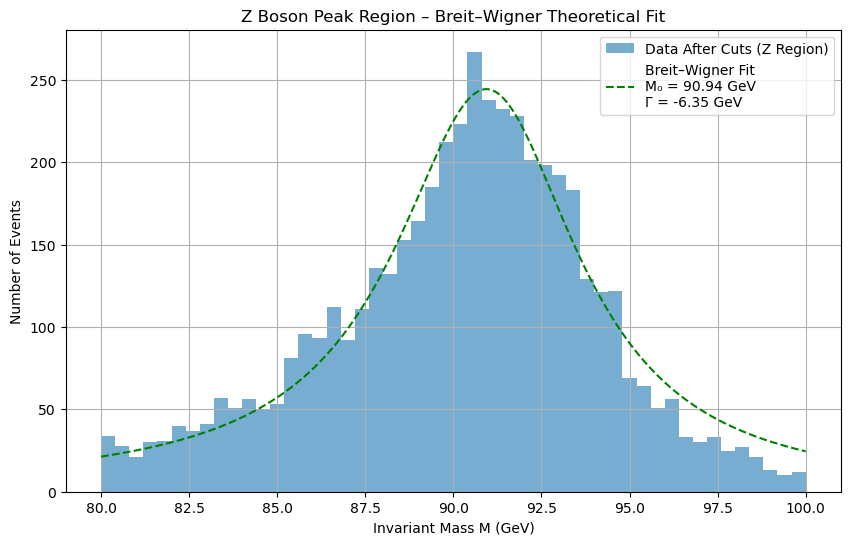

In [9]:
fit_data = data_cut[(data_cut['M'] > 80) & (data_cut['M'] < 100)] # Z region

def breit_wigner(mass, A, M0, Gamma):
    return A / ((mass**2 - M0**2)**2 + M0**2 * Gamma**2)

counts, edges = np.histogram(fit_data['M'], bins=50, range=(80, 100))
bin_centers = 0.5 * (edges[1:] + edges[:-1])  # middle point of each bin

guess_A = max(counts)
guess_M0 = 91
guess_Gamma = 2.5
initial_guess = [guess_A, guess_M0, guess_Gamma]

params, _ = opt.curve_fit(breit_wigner, bin_centers, counts, p0=initial_guess)

A_fit = params[0]
M0_fit = params[1]
Gamma_fit = params[2]

print("A =", A_fit)
print("M0 =", M0_fit)
print("Gamma =", Gamma_fit)


x_fit = np.linspace(80, 100, 500)
y_fit_bw = breit_wigner(x_fit, A_fit, M0_fit, Gamma_fit)

plt.figure(figsize=(10, 6))
plt.hist(fit_data['M'], bins=50, range=(80, 100), alpha=0.6, label='Data After Cuts (Z Region)')
plt.plot(x_fit, y_fit_bw, 'g--', label=f'Breit–Wigner Fit\nM₀ = {M0_fit:.2f} GeV\nΓ = {Gamma_fit:.2f} GeV')
plt.xlabel('Invariant Mass M (GeV)')
plt.ylabel('Number of Events')
plt.title('Z Boson Peak Region – Breit–Wigner Theoretical Fit')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Signal region around the Z boson peak 
signal_region = data_cut[(data_cut['M'] > 86) & (data_cut['M'] < 96)]
signal_events = len(signal_region)

# Background regions 
background_region = data_cut[((data_cut['M'] > 80) & (data_cut['M'] < 84)) |
                           ((data_cut['M'] > 98) & (data_cut['M'] < 100))]
background_events = len(background_region)

# Normalize 
background_per_GeV = background_events / 6
expected_background_in_signal = background_per_GeV * 10


signal_to_noise_ratio = signal_events / expected_background_in_signal

print(f"Signal events (Z region): {signal_events}")
print(f"Estimated background events (in Z region): {expected_background_in_signal:.2f}")
print(f"Signal-to-Noise ratio (S/N): {signal_to_noise_ratio:.2f}")

Signal events (Z region): 3908
Estimated background events (in Z region): 755.00
Signal-to-Noise ratio (S/N): 5.18
